In [1]:
import os
import pandas as pd
import seaborn as sns
from pathlib import Path
import numpy as np 
import seaborn as sns
import importlib


from sklearn.decomposition import PCA
from sklearn.manifold import TSNE 
import umap

import matplotlib.pyplot as plt

from src.utils.config import Config
from src.visualization import visualize
from src.data import make_dataset
from src.features import build_features

sns.set(
    style='whitegrid',
    font_scale=1.5
)

plt.style.use('ggplot')

In [2]:
labled_data_set,expression_level,labels,true_labels= make_dataset.get_data("original")
labled_data_set

,sample,Class,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,PRAD,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,sample_1,LUAD,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,sample_2,PRAD,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,sample_3,PRAD,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,sample_4,BRCA,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,sample_796,BRCA,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,sample_797,LUAD,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,sample_798,COAD,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,sample_799,PRAD,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


# Feature extraction and Feature selection 
## 1 - Dimensionality Reduction (PCA ,t-SNE ,UMAP) (Feature extraction)

## Principle Component Analysis (PCA)

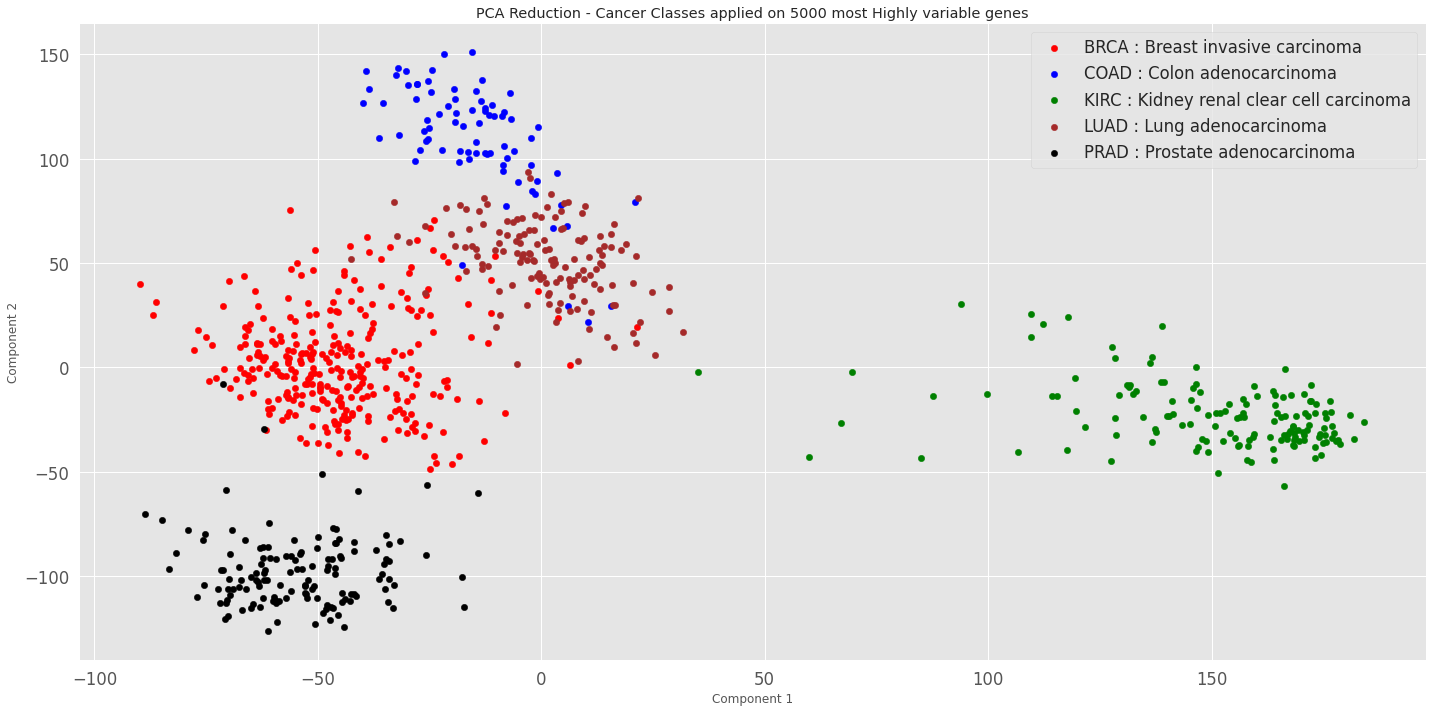

In [3]:
importlib.reload(visualize)

pca_reducer = PCA(n_components=2)
pca_reducer.fit(expression_level )
pc = pca_reducer.transform(expression_level )

visualize.visualize_dim_reduction(
    reduction=pc, 
    title='PCA Reduction - Cancer Classes applied on 5000 most Highly variable genes', 
    labels=true_labels["Class"].values,
    s=40,
    figsize=(20, 10)
)

The PCA representation shows a remarkable separation of different tumor type which means that gene expression profiles explain well the variability due the phenotype : Tumor type .    

## T-distributed stochastic neighbor embedding (t-SNE)

/home/ali/anaconda3/envs/ML_env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/ali/anaconda3/envs/ML_env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


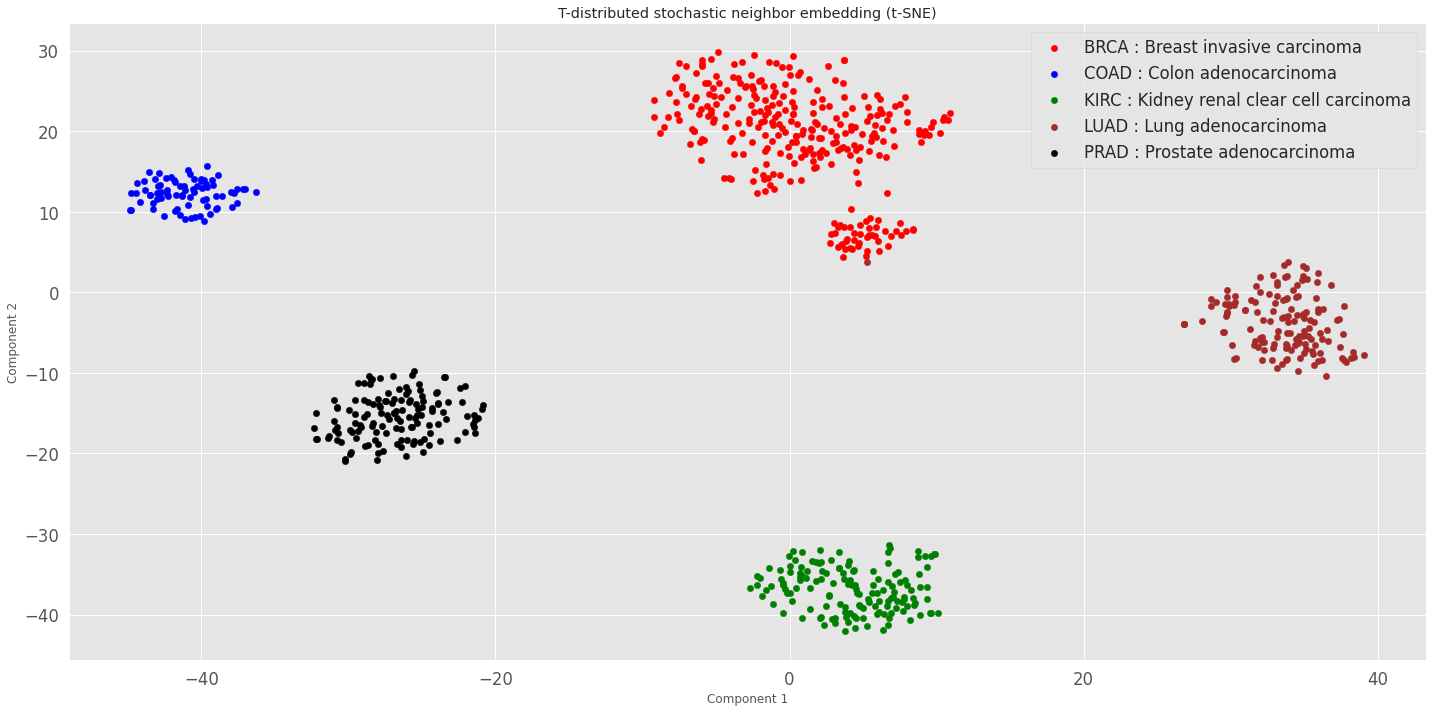

In [4]:
X_tsne = TSNE(n_components=2).fit_transform(expression_level)
 
visualize.visualize_dim_reduction(
    reduction=X_tsne, 
    title='T-distributed stochastic neighbor embedding (t-SNE)', 
    labels=true_labels["Class"].values,
    s=40,
    figsize=(20, 10)
)

Surprisingly , we observe a sub cluster within BRCA cluster 

# UMAP

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


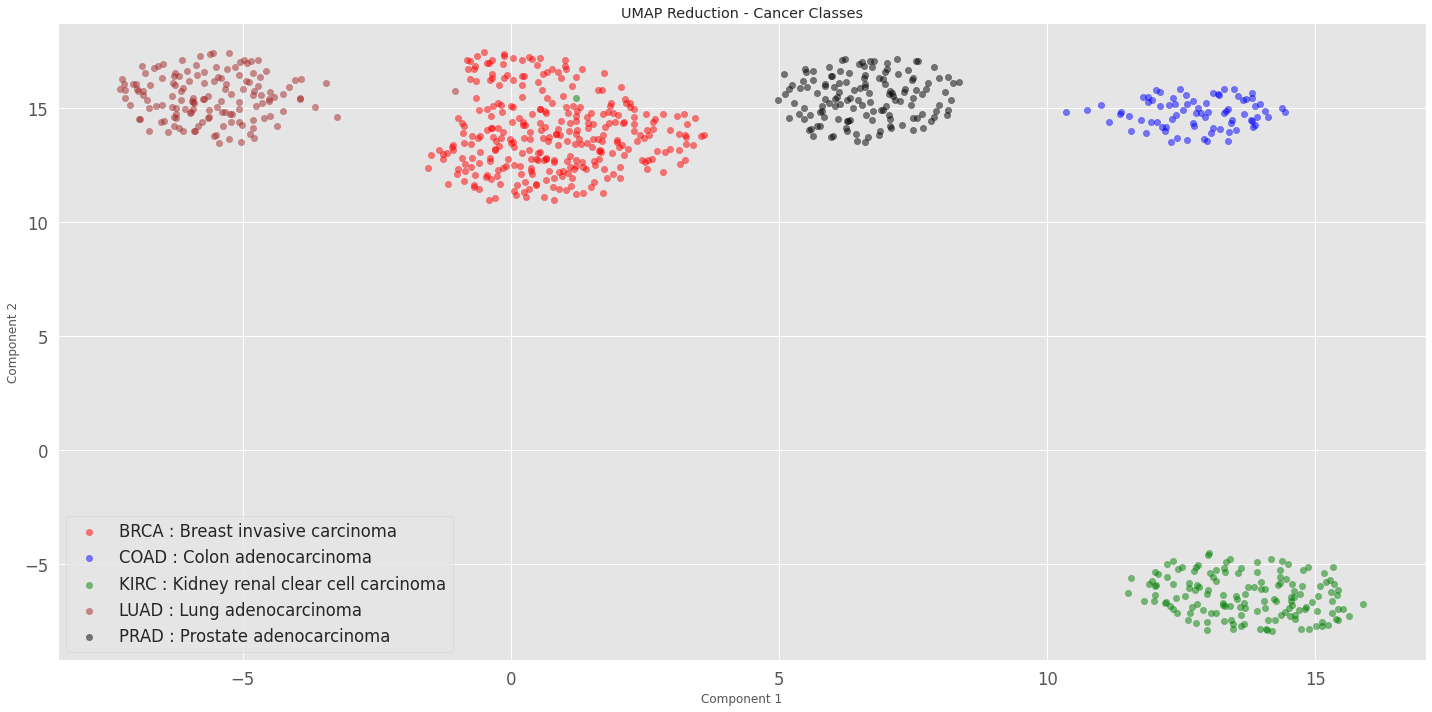

In [5]:
UMAP_COMPONENTS_REDUCTION = 2
UMAP_COMPONENTS_FEATURES = 20
UMAP_EPOCHS = 2000

manifold_reducer = umap.UMAP(
    n_components=UMAP_COMPONENTS_REDUCTION,
    n_neighbors=200, 
    n_epochs=UMAP_EPOCHS,
    metric='cosine',
    min_dist=0.9
)
manifold = manifold_reducer.fit_transform(expression_level)

visualize.visualize_dim_reduction(
    reduction=manifold, 
    title='UMAP Reduction - Cancer Classes', 
    labels=true_labels["Class"].values,
    s=40,
    figsize=(20, 10),
    alpha=0.5
)

## 2- Keeping only highly variable genes HVG (**Features selection**) 

We filtered the features to only keep those who have high variance , for instance , here we went from 20533 to  5000 

In [6]:
importlib.reload(build_features)
expression_level_5000_HGV , features_5000_HGV= build_features.top_k_variance(
    expression_level.values, 
    k=5000,
    names= expression_level.columns
)

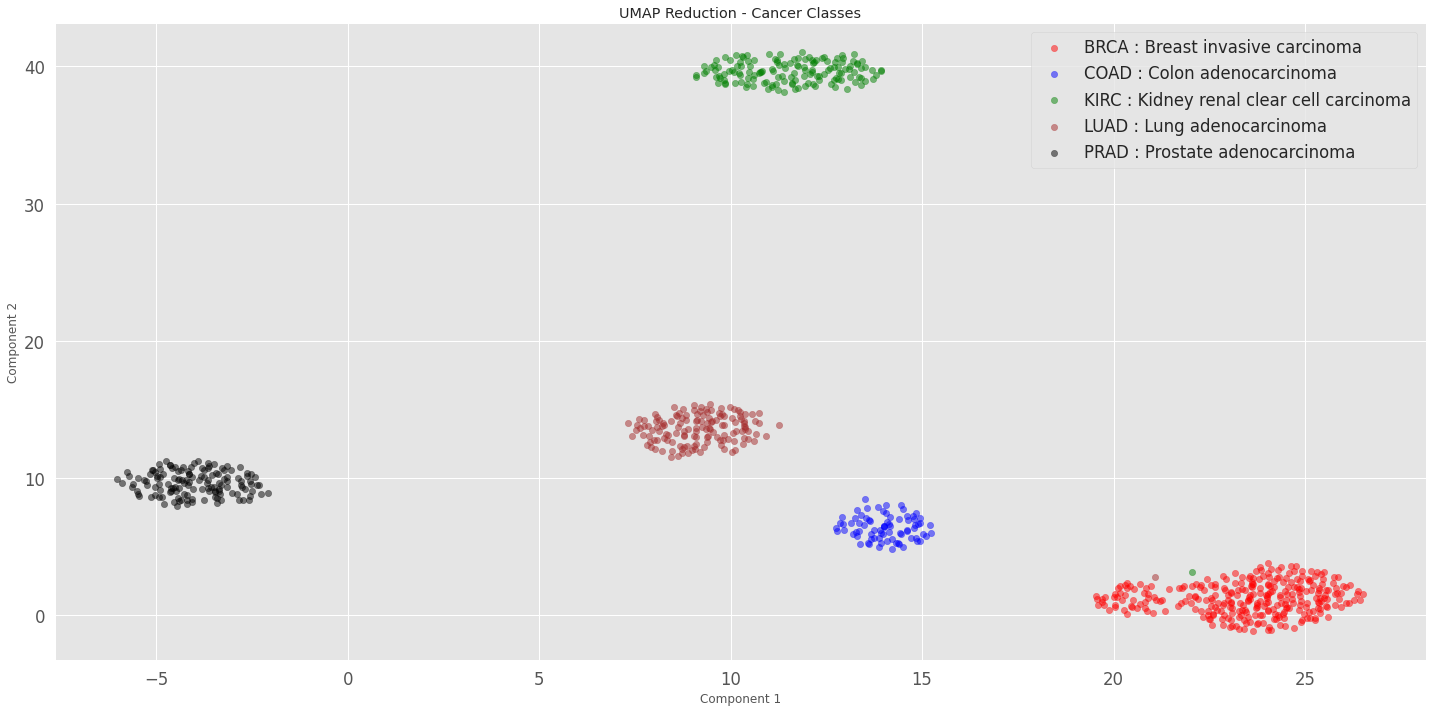

In [7]:
UMAP_COMPONENTS_REDUCTION = 2
UMAP_COMPONENTS_FEATURES = 20
UMAP_EPOCHS = 2000

manifold_reducer = umap.UMAP(
    n_components=UMAP_COMPONENTS_REDUCTION,
    n_neighbors=200, 
    n_epochs=UMAP_EPOCHS,
    metric='cosine',
    min_dist=0.9
)
manifold = manifold_reducer.fit_transform(expression_level_5000_HGV)

visualize.visualize_dim_reduction(
    reduction=manifold, 
    title='UMAP Reduction - Cancer Classes', 
    labels=true_labels["Class"].values,
    s=40,
    figsize=(20, 10),
    alpha=0.5
)

we observe here that , when keeping only the top 5000  highly variable genes we obtain a better separation of the underlying clusters    

# Saving files 
## - saving dimension-reduced datasets (PCA, UMAP, T-sne)
## - saving HVG

In [13]:

components= ["c1","c2"]

df_PCA =pd.DataFrame(pc,columns=components)
df_PCA.to_csv(Config.project_dir/ "data/transformed/PCA_reduction.csv")

df_PCA =pd.DataFrame(X_tsne,columns=components)
df_PCA.to_csv(Config.project_dir/ "data/transformed/TSNA_reduction.csv")

df_PCA =pd.DataFrame(manifold,columns=components)
df_PCA.to_csv(Config.project_dir/ "data/transformed/UMAP_reduction.csv")

# saving hvg
df_expression_level_5000_HGV =pd.DataFrame(expression_level_5000_HGV,columns=features_5000_HGV)
df_expression_level_5000_HGV.to_csv(Config.project_dir/ "data/transformed/expression_data_HVG_5000.csv")


# Clustering data (comparison with the actual labels  )

Here, we will try to cluster data based on transformed data (PCA) in the aim of comparing the known labels with the one generated by clustering algorithms like Hierarchical clustering (HLA) and k-means 


( Example )
In the image below the dataset has three dimensions. It can be seen from the 3D plot on the left that the 𝑋 dimension can be 'dropped' without losing much information. PCA is used to project the data onto two dimensions. In the figure to the left, the projection plane is also shown. Then, K-means can be used on the projected data to label the different groups, in the figure on the right, coded with different colors.

![image info](../reports/external_images/PCA_clustering.png)

Choosing the right number of clusters (initial clusters) Within Cluster Sum of Squares (WSCC) algorithm

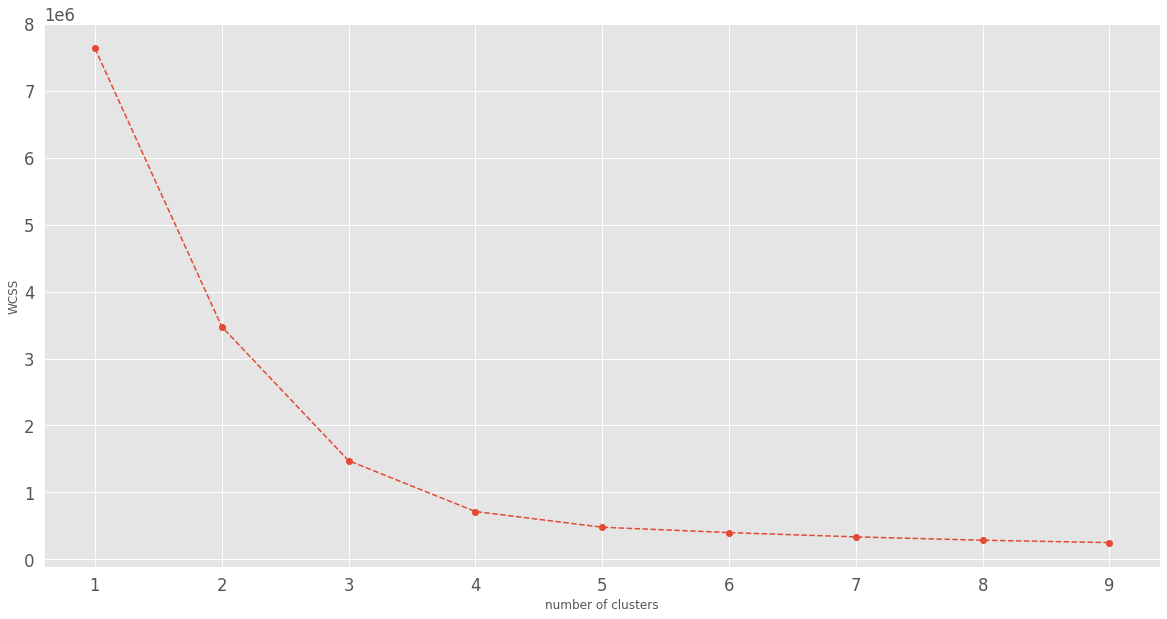

In [44]:
importlib.reload(visualize)
visualize.get_number_of_clusters(pc)

We can see here that the optimal number of cluster we can have  is 5 corresponding to the number of labels we have

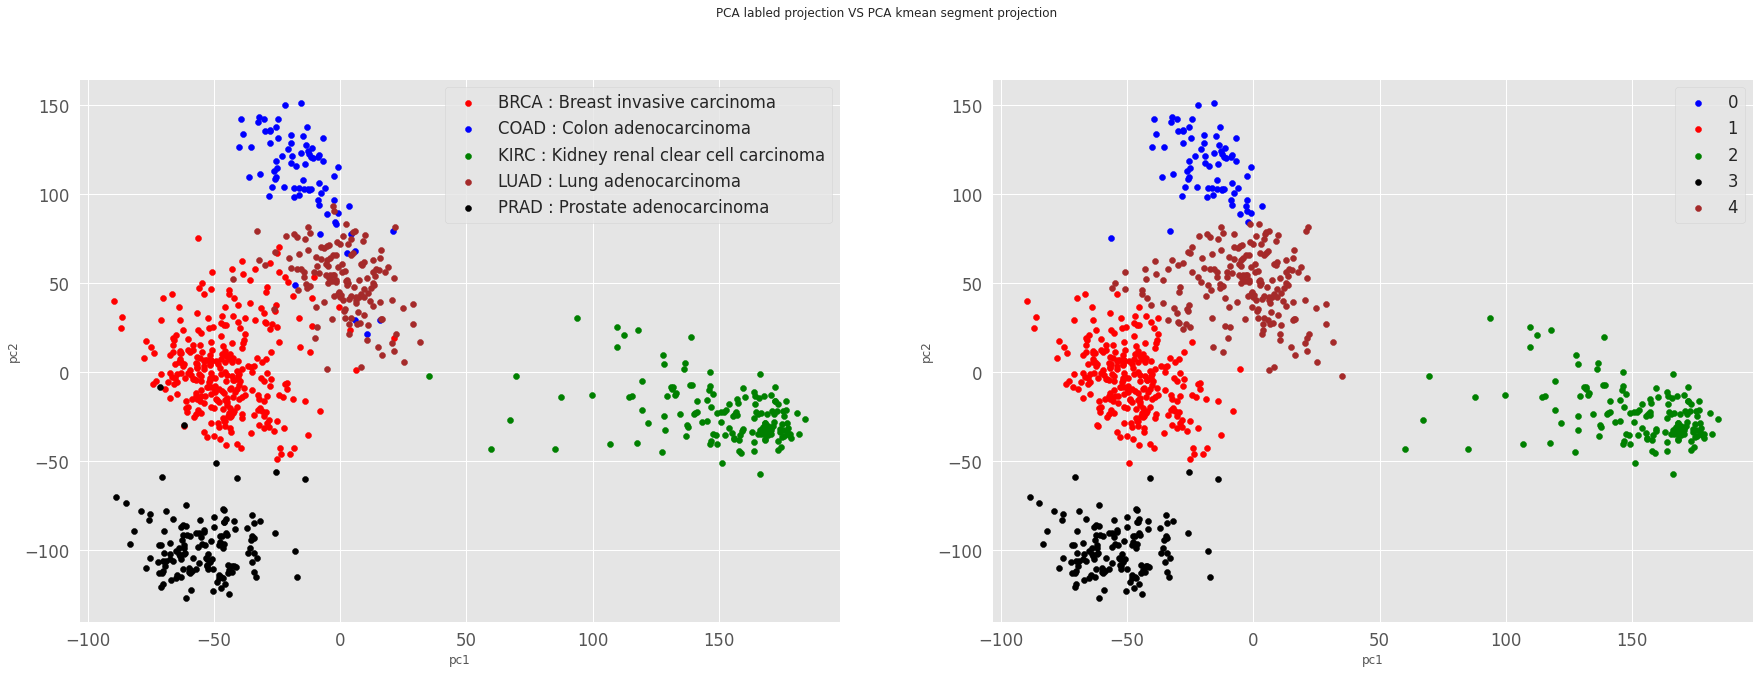

In [62]:
importlib.reload(visualize)
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
kmeans_pca =KMeans(n_clusters=5, init="k-means++" ,random_state=42)
kmeans_pca.fit(pc)
df_PCA["k-means cluster"]=kmeans_pca.labels_


visualize.visualize_2_subplots(
    reduction=pc ,
    labels_1 =true_labels["Class"].values,
    labels_2 =df_PCA["k-means cluster"].values ,
    title='',  
    figsize=(30, 10) 
    )



we the kmean clustering method  gives approximately the same segments as the segments obtained from PCA labeled projection  (small differences )

<Figure size 720x2160 with 0 Axes>

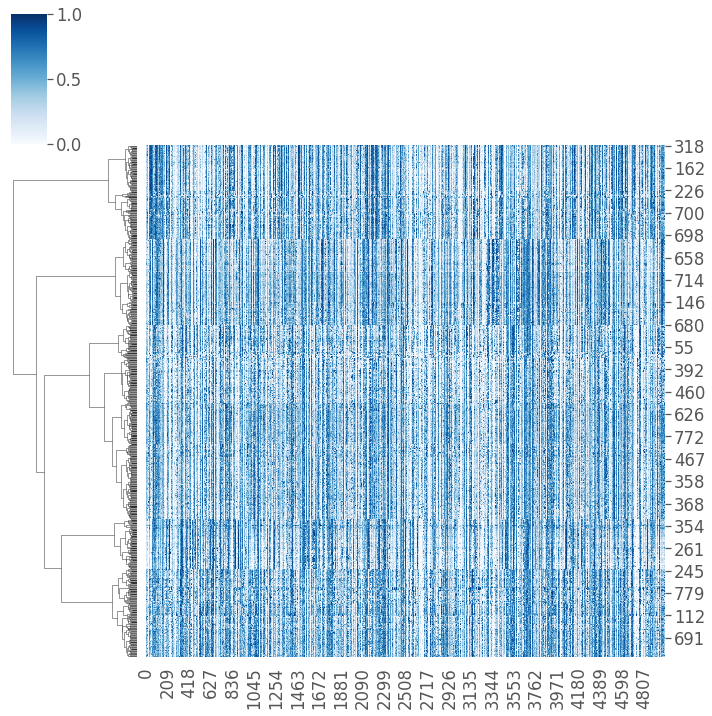

In [80]:
# Libraries
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
 
# Data set
df=expression_level_5000_HGV
 
# Change color palette
sns.clustermap(
    df,
    metric="euclidean",
    standard_scale=1,
    method="ward",
    cmap="Blues",
    col_cluster=False
    )
plt.show()

We can clearly see here that we have 5 clusters which is coherent because we have 5 labels 

# Conclusions

# Feature extraction and Feature selection 

### Features selection 

    - look for other techniques 
    Keeping only highly variable genes (HVG) 

### dimensionality reduction

    we can conclude that all these genes (features ) can be reduced to a lowed dimensional space (2 dim) that can explain as well the measured effect  (fewer features are required to capture the same information ) :
    -   this reduces the complexity of the model preventing over-fitting problems
    -   reduces the training time 


we will save the data with reduced dimensions in and selected features in csv files in order to test them later with different models 

